In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [2]:
def get_data(ticker: str, start_date: str=None, end_date: str=None):
    data = yf.download(tickers=ticker, start=start_date, end=end_date)
    close_data = data['Close']
    returns = close_data.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [3]:
stocklist = ['NVDA', 'AAPL', 'TSLA', 'MSFT']
stocks = [stock + '.AX' for stock in stocklist]

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365)

In [4]:
meanReturns, covMatrix = get_data(stocklist, start_date=startDate, end_date=endDate)

[*********************100%%**********************]  4 of 4 completed


In [9]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

In [12]:
meanReturns

Ticker
AAPL    0.000792
MSFT    0.001173
NVDA    0.004523
TSLA   -0.000090
dtype: float64

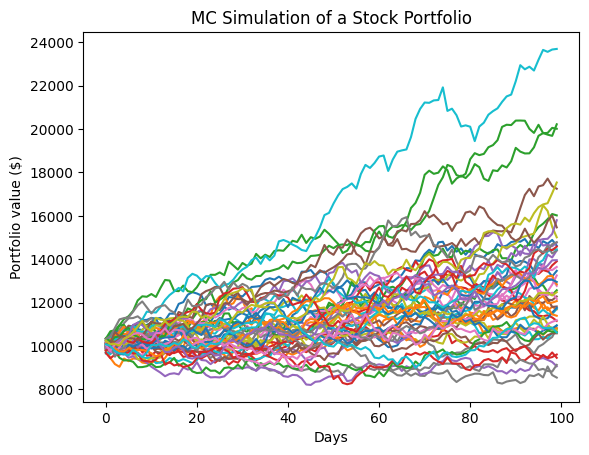

In [15]:
n_sim = 50
timeframe = 100

meanM = np.full(shape=(timeframe, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(timeframe, n_sim), fill_value=0.0)

initialPortfolio = 10000

for i in range(0, n_sim):
    Z = np.random.normal(size=(timeframe, len(weights)))
    L= np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:, i] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio value ($)')
plt.xlabel('Days')
plt.title('MC Simulation of a Stock Portfolio')
plt.show()

In [16]:
type(portfolio_sims)

numpy.ndarray